In [1]:
import torchvision
import torch.nn as nn
import torch
from torch.optim import Adam
from collections import OrderedDict
import numpy as np
from matplotlib import pyplot as plt
import time

In [2]:
class OneLayerModel(nn.Module):
    def __init__(self, input_shape, hidden_shape, out_shape):
        super().__init__()
        self.net = nn.Sequential(OrderedDict([
            ("hidden_layer", nn.Linear(input_shape, hidden_shape)),
            ("relu", nn.ReLU()),
            ("out_layer", nn.Linear(hidden_shape, out_shape))
        ]))
    def forward(self, x):
        return self.net(x)

In [70]:
model1

OneLayerModel(
  (net): Sequential(
    (hidden_layer): Linear(in_features=1, out_features=16, bias=True)
    (relu): ReLU()
    (out_layer): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [52]:
class MultiLayerModel(nn.Module):
    
    def __init__(self, input_shape, out_shape, layers):
        super().__init__()
        list_of_layers = [nn.Linear(input_shape, layers[0]), nn.ReLU()]
        for i in range(1, len(layers)):
            list_of_layers.append(nn.Linear(layers[i - 1], layers[i]))
            list_of_layers.append(nn.ReLU())
        list_of_layers.append(nn.Linear(layers[-1], out_shape))
        self.net = nn.Sequential(*list_of_layers)
        
    def forward(self, x):
        return self.net(x)

    def init_weights(self, seed):
        torch.manual_seed(seed)
        for i in range(0, len(self.net) - 1, 2):
            torch.nn.init.kaiming_uniform_(self.net[i].weight, nonlinearity='relu')
            torch.nn.init.zeros_(self.net[i].bias)
        torch.nn.init.kaiming_uniform_(self.net[-1].weight)
        torch.nn.init.zeros_(self.net[-1].bias)

In [4]:
model = OneLayerModel(1, 16, 1)
multi_model = MultiLayerModel(1, 1, [4 ,8, 16])

In [4]:
def train(model, loss_fn, optimizer, epochs, x, y, step, x_test=None, y_test=None):
    model.train()
    ret = 0
    hist = []
    for i in range(epochs):
        optimizer.zero_grad()
        pred = model(x)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()
        ret = loss.item()
        if i % step == 0:
            print("epoch = {}, loss = {}".format(i, loss.item()))
            if x_test is None:
                print(40 * '-')
                continue
            pred = torch.argmax(model(x_test), dim=1)
            acc = torch.sum(pred == y_test).item() / 10000
            print("accuracy = {}".format(acc))
            print(40 * '-')
            hist.append(acc)
    return hist

In [6]:
x = np.linspace(0, 10, 40)
x = torch.tensor(x, dtype=torch.float32)
y = x ** 2 - 2 * x ** 1.5 + 20 * torch.sin(x) + torch.rand_like(x) * 4

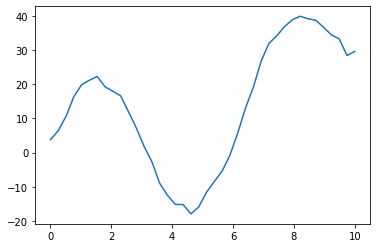

In [7]:
plt.plot(x, y)

# MNIST

In [8]:
data_train = torchvision.datasets.MNIST('MNIST', download=False)
data_test = torchvision.datasets.MNIST('MNIST', train=False, download=False)

In [9]:
print(data_train.data.shape)
print(data_test.data.shape)

print(data_train.target_transform)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
None


In [12]:
X_train = data_train.data.reshape(60000, -1).to(dtype=torch.float32)
X_test = data_test.data.reshape( 10000, -1).to(dtype=torch.float32)

Y_train = data_train.targets.to(dtype=torch.long)
Y_test = data_test.targets.to(dtype=torch.long)

In [19]:
torch.manual_seed(42)

model1 = OneLayerModel(28 * 28, 50, 10)
optimizer1 = Adam(model1.parameters())
loss_fn = nn.CrossEntropyLoss()

train(model1, nn.CrossEntropyLoss(), optimizer1, 100, X_train, Y_train, 10, X_test, Y_test)

epoch = 0, loss = 37.206512451171875
accuracy = 0.1825
----------------------------------------
epoch = 10, loss = 3.2518486976623535
accuracy = 0.6201
----------------------------------------
epoch = 20, loss = 1.4199376106262207
accuracy = 0.6916
----------------------------------------
epoch = 30, loss = 0.9884483814239502
accuracy = 0.7317
----------------------------------------
epoch = 40, loss = 0.8219462037086487
accuracy = 0.7756
----------------------------------------
epoch = 50, loss = 0.7044059634208679
accuracy = 0.8209
----------------------------------------
epoch = 60, loss = 0.6249816417694092
accuracy = 0.8426
----------------------------------------
epoch = 70, loss = 0.5667784214019775
accuracy = 0.8575
----------------------------------------
epoch = 80, loss = 0.5220144987106323
accuracy = 0.8656
----------------------------------------
epoch = 90, loss = 0.4844282865524292
accuracy = 0.8742
----------------------------------------


[0.1825,
 0.6201,
 0.6916,
 0.7317,
 0.7756,
 0.8209,
 0.8426,
 0.8575,
 0.8656,
 0.8742]

In [22]:
torch.manual_seed(42)

model2 = MultiLayerModel(28 * 28, 10, [40, 10])
optimizer2 = Adam(model2.parameters())
loss_fn = nn.CrossEntropyLoss()

hist2 = train(model2, nn.CrossEntropyLoss(), optimizer2, 100, X_train, Y_train, 10, X_test, Y_test)

epoch = 0, loss = 8.623846054077148
accuracy = 0.1255
----------------------------------------
epoch = 10, loss = 2.0673916339874268
accuracy = 0.2789
----------------------------------------
epoch = 20, loss = 1.7508118152618408
accuracy = 0.4387
----------------------------------------
epoch = 30, loss = 1.5108546018600464
accuracy = 0.4912
----------------------------------------
epoch = 40, loss = 1.3694982528686523
accuracy = 0.5279
----------------------------------------
epoch = 50, loss = 1.2468433380126953
accuracy = 0.5752
----------------------------------------
epoch = 60, loss = 1.1444326639175415
accuracy = 0.6193
----------------------------------------
epoch = 70, loss = 1.0556254386901855
accuracy = 0.6488
----------------------------------------
epoch = 80, loss = 0.9679543375968933
accuracy = 0.6998
----------------------------------------
epoch = 90, loss = 0.8865706920623779
accuracy = 0.7425
----------------------------------------


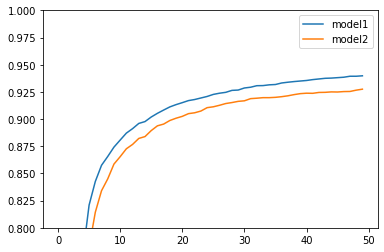

In [105]:
plt.ylim(0.8, 1.0)
plt.plot(hist1, label="model1")
plt.plot(hist2, label="model2")
plt.legend()


In [250]:
torch.manual_seed(42)

model1 = OneLayerModel(1, 8, 1)
optimzer1 = Adam(model1.parameters(), lr=0.1)
loss_fn = nn.MSELoss()

X = x.reshape(-1, 1)
Y = y.reshape(-1, 1)

train(model1, loss_fn, optimzer1, 300, X, Y, 30)

epoch = 0, loss = 446.12646484375
----------------------------------------
epoch = 30, loss = 224.68063354492188
----------------------------------------
epoch = 60, loss = 177.3312225341797
----------------------------------------
epoch = 90, loss = 107.3442153930664
----------------------------------------
epoch = 120, loss = 91.718017578125
----------------------------------------
epoch = 150, loss = 90.46311950683594
----------------------------------------
epoch = 180, loss = 89.68209075927734
----------------------------------------
epoch = 210, loss = 89.29779052734375
----------------------------------------
epoch = 240, loss = 89.02264404296875
----------------------------------------
epoch = 270, loss = 88.7792739868164
----------------------------------------


[]

In [253]:
torch.manual_seed(42)

model2 = MultiLayerModel(1, 1, [4, 4])
optimzer2 = Adam(model2.parameters(), lr=0.1)
loss_fn = nn.MSELoss()

X = x.reshape(-1, 1)
Y = y.reshape(-1, 1)

train(model2, loss_fn, optimzer2, 300, X, Y, 30)

epoch = 0, loss = 502.5111389160156
----------------------------------------
epoch = 30, loss = 252.1134033203125
----------------------------------------
epoch = 60, loss = 240.16281127929688
----------------------------------------
epoch = 90, loss = 146.2003631591797
----------------------------------------
epoch = 120, loss = 139.13104248046875
----------------------------------------
epoch = 150, loss = 138.48048400878906
----------------------------------------
epoch = 180, loss = 138.40309143066406
----------------------------------------
epoch = 210, loss = 138.3972930908203
----------------------------------------
epoch = 240, loss = 138.39697265625
----------------------------------------
epoch = 270, loss = 138.39694213867188
----------------------------------------


[]

[] []


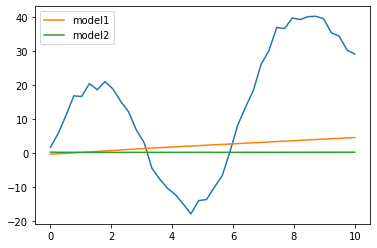

epoch = 0, loss = 446.12646484375
----------------------------------------
epoch = 0, loss = 519.4771728515625
----------------------------------------
[] []


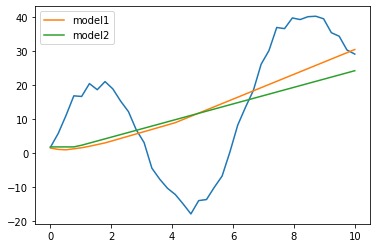

epoch = 0, loss = 225.2435760498047
----------------------------------------
epoch = 30, loss = 97.68891143798828
----------------------------------------
epoch = 0, loss = 253.1670684814453
----------------------------------------
epoch = 30, loss = 153.40567016601562
----------------------------------------
[] []


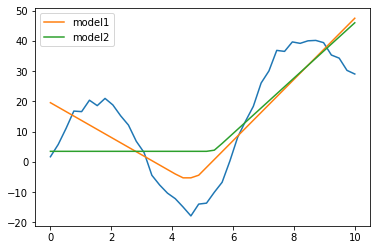

epoch = 0, loss = 90.42335510253906
----------------------------------------
epoch = 30, loss = 88.94172668457031
----------------------------------------
epoch = 60, loss = 88.4478759765625
----------------------------------------
epoch = 0, loss = 138.56895446777344
----------------------------------------
epoch = 30, loss = 138.4278564453125
----------------------------------------
epoch = 60, loss = 138.39732360839844
----------------------------------------
[] []


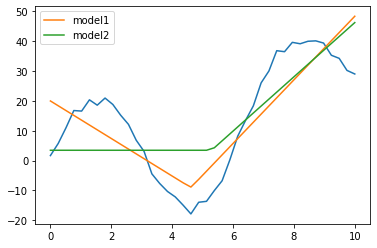

epoch = 0, loss = 88.31935119628906
----------------------------------------
epoch = 30, loss = 88.54536437988281
----------------------------------------
epoch = 60, loss = 88.62445068359375
----------------------------------------
epoch = 90, loss = 88.59022521972656
----------------------------------------
epoch = 0, loss = 138.39703369140625
----------------------------------------
epoch = 30, loss = 138.39695739746094
----------------------------------------
epoch = 60, loss = 138.39694213867188
----------------------------------------
epoch = 90, loss = 138.39694213867188
----------------------------------------
[] []


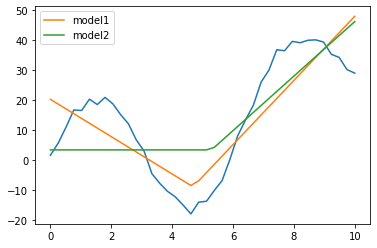

epoch = 0, loss = 88.85626983642578
----------------------------------------
epoch = 30, loss = 88.28804016113281
----------------------------------------
epoch = 60, loss = 88.47879791259766
----------------------------------------
epoch = 90, loss = 88.72713470458984
----------------------------------------
epoch = 120, loss = 88.30672454833984
----------------------------------------
epoch = 0, loss = 138.39694213867188
----------------------------------------
epoch = 30, loss = 138.39694213867188
----------------------------------------
epoch = 60, loss = 138.39694213867188
----------------------------------------
epoch = 90, loss = 138.39706420898438
----------------------------------------
epoch = 120, loss = 161.51148986816406
----------------------------------------
[] []


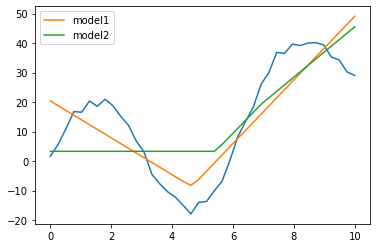

epoch = 0, loss = 88.53166198730469
----------------------------------------
epoch = 30, loss = 88.51576232910156
----------------------------------------
epoch = 60, loss = 88.64896392822266
----------------------------------------
epoch = 90, loss = 88.51318359375
----------------------------------------
epoch = 120, loss = 88.5060806274414
----------------------------------------
epoch = 150, loss = 88.51179504394531
----------------------------------------
epoch = 0, loss = 133.59451293945312
----------------------------------------
epoch = 30, loss = 124.64448547363281
----------------------------------------
epoch = 60, loss = 118.26133728027344
----------------------------------------
epoch = 90, loss = 114.31813049316406
----------------------------------------
epoch = 120, loss = 111.88517761230469
----------------------------------------
epoch = 150, loss = 109.67369079589844
----------------------------------------
[] []


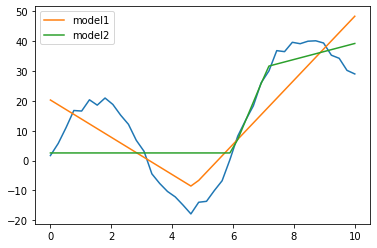

epoch = 0, loss = 88.57670593261719
----------------------------------------
epoch = 30, loss = 88.66021728515625
----------------------------------------
epoch = 60, loss = 88.64945220947266
----------------------------------------
epoch = 90, loss = 88.4717788696289
----------------------------------------
epoch = 120, loss = 88.62329864501953
----------------------------------------
epoch = 150, loss = 88.5875244140625
----------------------------------------
epoch = 180, loss = 88.75837707519531
----------------------------------------
epoch = 0, loss = 107.88227844238281
----------------------------------------
epoch = 30, loss = 115.45733642578125
----------------------------------------
epoch = 60, loss = 108.35272216796875
----------------------------------------
epoch = 90, loss = 106.8861312866211
----------------------------------------
epoch = 120, loss = 105.60294342041016
----------------------------------------
epoch = 150, loss = 104.14424133300781
---------------------

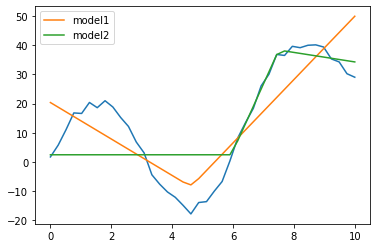

epoch = 0, loss = 88.90216064453125
----------------------------------------
epoch = 30, loss = 88.27303314208984
----------------------------------------
epoch = 60, loss = 88.66109466552734
----------------------------------------
epoch = 90, loss = 88.4265365600586
----------------------------------------
epoch = 120, loss = 88.51187896728516
----------------------------------------
epoch = 150, loss = 88.55330657958984
----------------------------------------
epoch = 180, loss = 88.36296081542969
----------------------------------------
epoch = 210, loss = 88.4884033203125
----------------------------------------
epoch = 0, loss = 101.91826629638672
----------------------------------------
epoch = 30, loss = 101.65518188476562
----------------------------------------
epoch = 60, loss = 102.4930191040039
----------------------------------------
epoch = 90, loss = 101.18850708007812
----------------------------------------
epoch = 120, loss = 102.39478302001953
----------------------

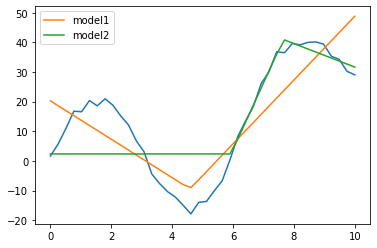

epoch = 0, loss = 88.38841247558594
----------------------------------------
epoch = 30, loss = 88.31102752685547
----------------------------------------
epoch = 60, loss = 88.35418701171875
----------------------------------------
epoch = 90, loss = 88.54631805419922
----------------------------------------
epoch = 120, loss = 88.50015258789062
----------------------------------------
epoch = 150, loss = 88.51029205322266
----------------------------------------
epoch = 180, loss = 88.3769302368164
----------------------------------------
epoch = 210, loss = 88.33906555175781
----------------------------------------
epoch = 240, loss = 88.49771118164062
----------------------------------------
epoch = 0, loss = 101.11412048339844
----------------------------------------
epoch = 30, loss = 101.07566833496094
----------------------------------------
epoch = 60, loss = 102.57950592041016
----------------------------------------
epoch = 90, loss = 102.21051025390625
---------------------

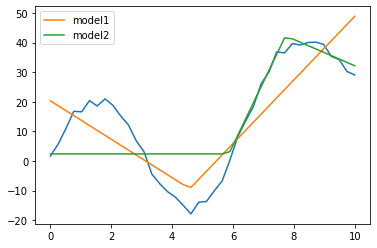

In [256]:
torch.manual_seed(42)

model1 = OneLayerModel(1, 8, 1)
model2 = MultiLayerModel(1, 1, [5, 3])
optimizer1 = Adam(model1.parameters(), lr=0.3)
optimizer2 = Adam(model2.parameters(), lr=0.3)
loss_fn = nn.MSELoss()

for i in range(10):
    loss1 = train(model1, loss_fn, optimizer1, 30 * i, X, Y, 30)
    loss2 = train(model2, loss_fn, optimizer2, 30 * i, X, Y, 30)
    print(loss1, loss2)
    plt.plot(x, y)
    plt.plot(x, model1(X).reshape(-1).detach().numpy(), label='model1')
    plt.plot(x, model2(X).reshape(-1).detach().numpy(), label='model2')
    plt.legend()
    plt.show()
    time.sleep(1)

In [232]:
print(model2)

MultiLayerModel(
  (net): Sequential(
    (0): Linear(in_features=1, out_features=4, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=4, out_features=1, bias=True)
  )
)


In [203]:
X = x.reshape(-1, 1).to(dtype=torch.float32)
Y = func(X).to(dtype=torch.float32)

In [204]:
Y

tensor([[6.2583e-03],
        [1.0028e+00],
        [1.0045e+00],
        [1.0013e+00],
        [1.0096e+00],
        [2.0013e+00],
        [2.0077e+00],
        [2.0068e+00],
        [2.0066e+00],
        [3.0023e+00],
        [3.0095e+00],
        [3.0061e+00],
        [3.0056e+00],
        [4.0006e+00],
        [4.0071e+00],
        [4.0043e+00],
        [4.0027e+00],
        [5.0093e+00],
        [5.0061e+00],
        [5.0022e+00],
        [5.0025e+00],
        [6.0048e+00],
        [6.0078e+00],
        [6.0037e+00],
        [6.0021e+00],
        [7.0033e+00],
        [7.0013e+00],
        [7.0068e+00],
        [7.0089e+00],
        [8.0003e+00],
        [8.0062e+00],
        [8.0076e+00],
        [8.0059e+00],
        [9.0032e+00],
        [9.0076e+00],
        [9.0076e+00],
        [9.0069e+00],
        [1.0004e+01],
        [1.0004e+01],
        [1.0006e+01],
        [1.0004e+01]])

In [279]:
def train(model, loss_fn, optimizer, epochs, x, y, step, x_test=None, y_test=None):
    model.train()
    ret = 0
    hist = []
    for i in range(1, epochs + 1):
        optimizer.zero_grad()
        pred = model(x)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()
        ret = loss.item()
        if i % step == 0:
            print("epoch = {}, loss = {}".format(i, loss.item()))
            if x_test is None:
                print(40 * '-')
                continue
            pred = torch.argmax(model(x_test), dim=1)
            acc = torch.sum(pred.reshape(-1, 1) == y_test).item() / 10000
            print("accuracy = {}".format(acc))
            print(40 * '-')
            hist.append(acc)
    return hist

In [236]:
torch.manual_seed(42)

model1 = OneLayerModel(1, 100, 1)
model2 = MultiLayerModel(1, 1, [8, 8])

optimizer1 = Adam(model1.parameters(), lr=0.1)
optimizer2 = Adam(model2.parameters(), lr=0.01)

train(model2, nn.MSELoss(), optimizer2, 100, X, Y, 10)
train(model1, nn.MSELoss(), optimizer1, 100, X, Y, 10)



epoch = 0, loss = 39.10881042480469
----------------------------------------
epoch = 10, loss = 29.458341598510742
----------------------------------------
epoch = 20, loss = 21.09920883178711
----------------------------------------
epoch = 30, loss = 8.421293258666992
----------------------------------------
epoch = 40, loss = 1.141428828239441
----------------------------------------
epoch = 50, loss = 1.6434504985809326
----------------------------------------
epoch = 60, loss = 0.6683899760246277
----------------------------------------
epoch = 70, loss = 0.4971487820148468
----------------------------------------
epoch = 80, loss = 0.22976770997047424
----------------------------------------
epoch = 90, loss = 0.14623980224132538
----------------------------------------
epoch = 0, loss = 48.0060920715332
----------------------------------------
epoch = 10, loss = 5.38131856918335
----------------------------------------
epoch = 20, loss = 2.0773367881774902
----------------------

[]

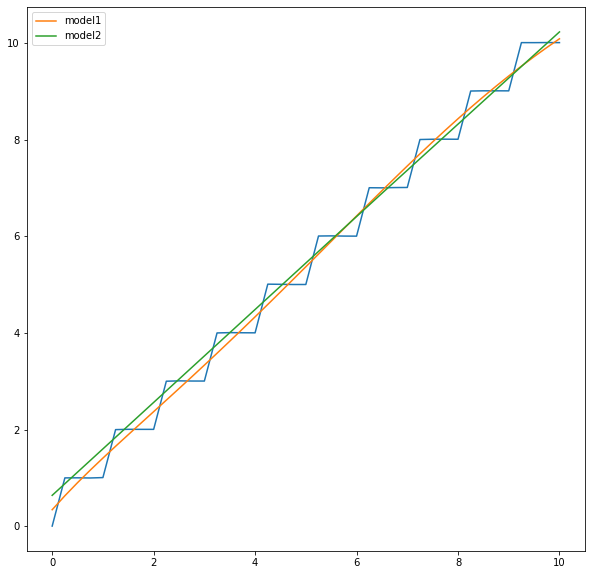

In [237]:
plt.figure(figsize=(10, 10))
plt.plot(X.reshape(-1), Y.reshape(-1))
plt.plot(X.reshape(-1), model1(X).reshape(-1).detach().numpy(), label="model1")
plt.plot(X.reshape(-1), model2(X).reshape(-1).detach().numpy(), label="model2")
plt.legend()
plt.show()

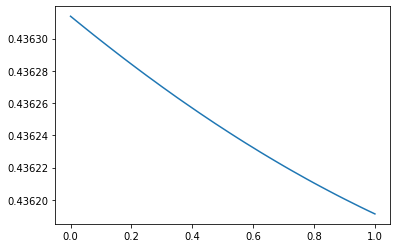

In [195]:
test_model = OneLayerModel(1, 1, )

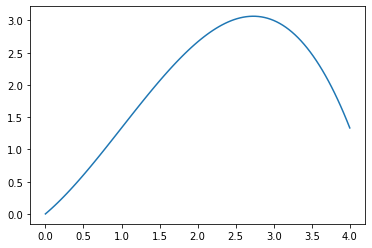

In [68]:
def func(x):
    por = np.linspace(0, 4, 5)
    ans = torch.zeros_like(x)
    for i in range(1, len(por)):
        ans[(x <= por[i]) * (x > por[i - 1])] = por[i] * 3
    return ans + torch.rand_like(ans) * 0.01

def func2(x):
    return torch.sin(x * 3) * x

def func3(x):
    return x**2

def func4(x):
    return x>2

def func5(x):
    return x + 1/2 * x**2 - 1/6 * x**3

x = torch.tensor(np.linspace(0, 4, 101))
y = func5(x)

plt.plot(x, y)

epoch = 0, loss = 22.97550392150879
----------------------------------------
epoch = 0, loss = 22.56847381591797
----------------------------------------
[] []


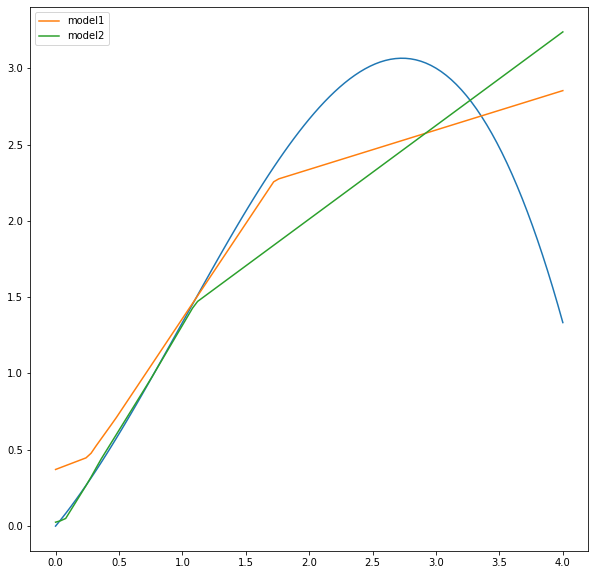

epoch = 0, loss = 0.1923925131559372
----------------------------------------
epoch = 0, loss = 0.3458642363548279
----------------------------------------
[] []


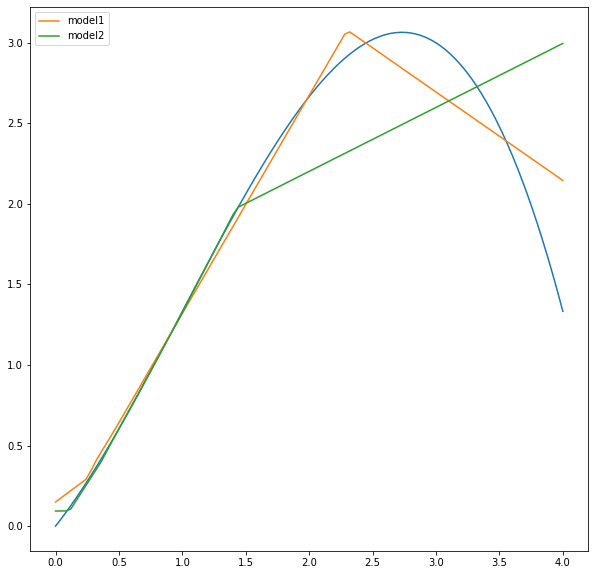

epoch = 0, loss = 0.0398203544318676
----------------------------------------
epoch = 0, loss = 0.23607783019542694
----------------------------------------
[] []


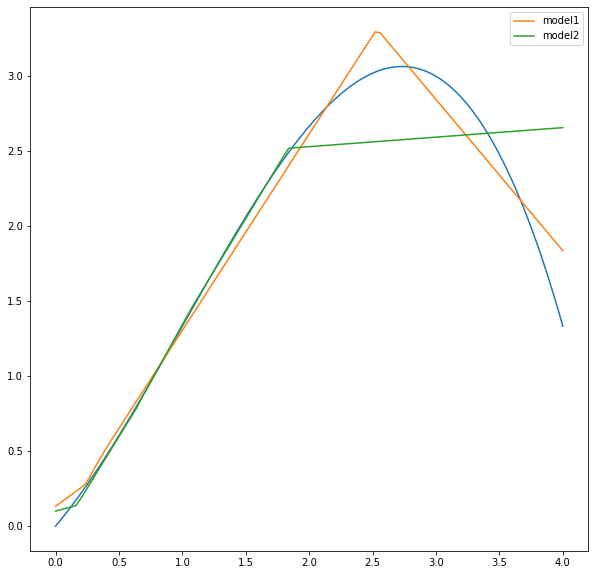

epoch = 0, loss = 0.018861211836338043
----------------------------------------
epoch = 0, loss = 0.1289597749710083
----------------------------------------
[] []


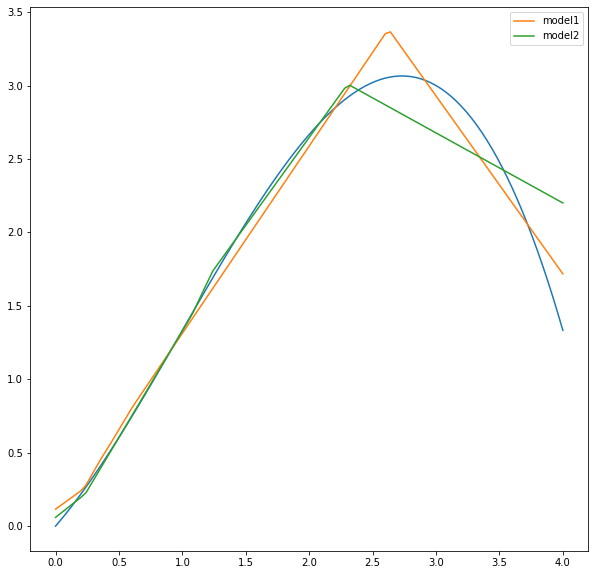

epoch = 0, loss = 0.01596386544406414
----------------------------------------
epoch = 0, loss = 0.044287554919719696
----------------------------------------
[] []


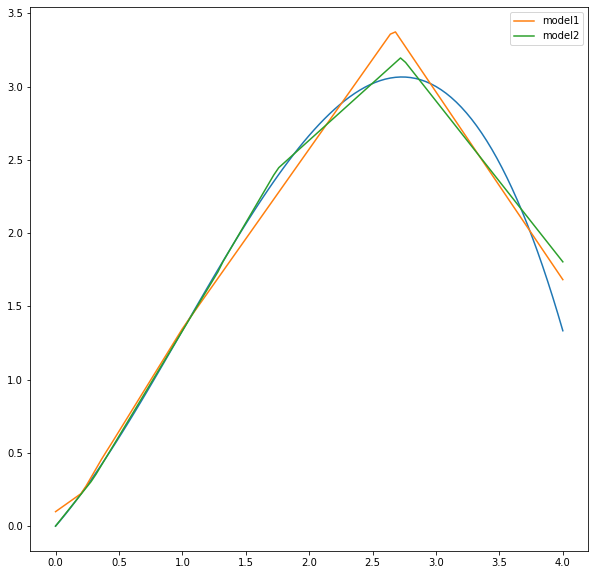

epoch = 0, loss = 0.014280800707638264
----------------------------------------
epoch = 0, loss = 0.010697889141738415
----------------------------------------
[] []


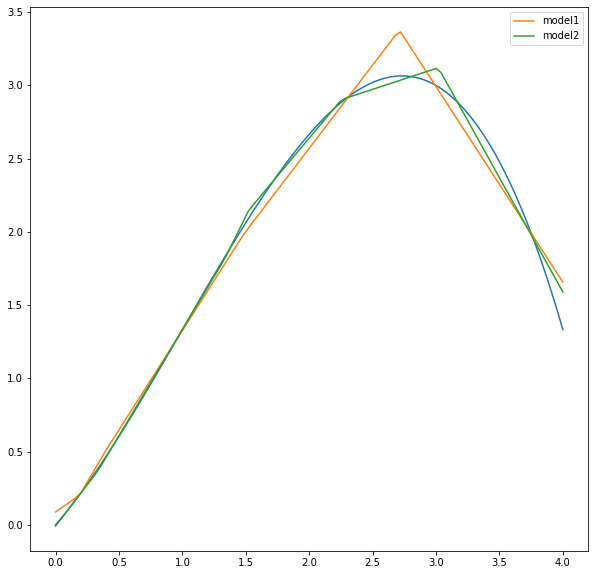

epoch = 0, loss = 0.012001540511846542
----------------------------------------
epoch = 0, loss = 0.0031394215766340494
----------------------------------------
[] []


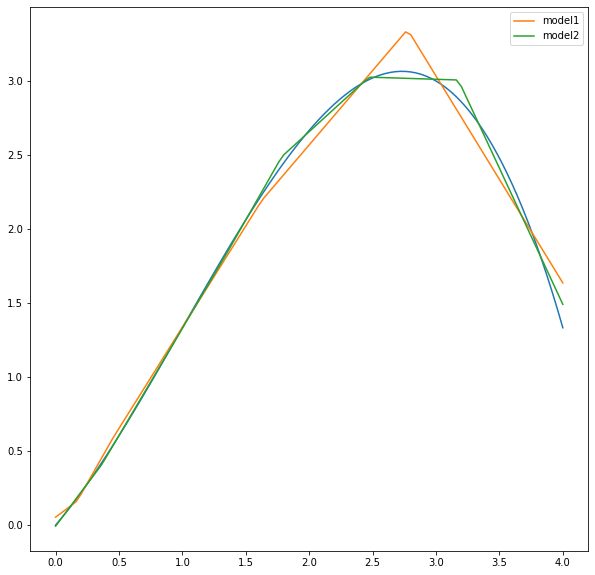

KeyboardInterrupt: 

In [69]:
X = x.reshape(-1, 1).to(dtype=torch.float32)
Y = y.reshape(-1, 1).to(dtype=torch.float32)

torch.manual_seed(42)

model1 = OneLayerModel(1, 16, 1)
model2 = MultiLayerModel(1, 1, [4, 4, 4])
model2.init_weights(42)
optimizer1 = Adam(model1.parameters())
optimizer2 = Adam(model2.parameters())
loss_fn = nn.MSELoss()

nn.init.kaiming_normal_(model1.net[0].weight, nonlinearity='relu')
nn.init.kaiming_normal_(model1.net[2].weight)

# nn.init.kaiming_normal_(model2.net[0].weight, nonlinearity='relu')
# nn.init.kaiming_normal_(model2.net[2].weight, nonlinearity='relu')
# nn.init.kaiming_normal_(model2.net[4].weight, nonlinearity='relu')
# nn.init.kaiming_normal_(model2.net[6].weight, nonlinearity='relu')
# nn.init.kaiming_normal_(model2.net[8].weight)
# nn.init.kaiming_normal_(model2.net[10].weight)

for i in range(20):
    loss1 = train(model1, loss_fn, optimizer1, 1000, X, Y, 1000)
    loss2 = train(model2, loss_fn, optimizer2, 1000, X, Y, 1000)
    print(loss1, loss2)
    plt.figure(figsize=(10, 10))
    plt.plot(x, y)
    plt.plot(x, model1(X).reshape(-1).detach().numpy(), label='model1')
    plt.plot(x, model2(X).reshape(-1).detach().numpy(), label='model2')
    plt.legend()
    plt.savefig("simple_history/" + "img{}.jpg".format(i))
    plt.show()
    time.sleep(1)

In [265]:
from torch.optim import SGD

In [286]:
from PIL import Image

In [303]:
frames = []
 
for i in range(10):
    frame = Image.open('simple_history/img{}.jpg'.format(i))
    frames.append(frame)
 
frames[0].save(
    'simple_history/out.gif',
    save_all=True,
    append_images=frames[1:],  # Срез который игнорирует первый кадр.
    optimize=True,
    duration=300,
    loop=0
)

In [299]:
frames[0].save(
    'simple_history/out.gif',
    format="GIF",
    save_all=True,
    append_images=frames[1:],
    optimize=True,
    duration=300,
    loop=0
)